#**Scikit Learn**
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistent interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.
Today we are looking at 3 basic things utilizing sklearn:
*   Loading data sets
*   Creating and training models
*   Saving these models
*   There's a sample program which you can look at to understand the bigger picture





# **Types of Data Analysis using Scikitlearn:**
  *   Classification
      *   SVMs
      *   Random Forest Classifiers
  *   Regression
      *   Least Squares and Loss Function
      *   Random Forest Classifiers
  *   Clustering
      *   Automatic grouping of similar objects into sets
      *   Ex: Amazon product references
  *   Dimensionality
      *   Reducing the number of random variables to consider
      *   Random Forest Classifiers
  *   Model Selection
      *   SVMs
      *   Random Forest Classifiers
  *   Preprocessing
      *   Feature extraction and normalization
      *   Transforming input data such as text for use with machine learning algorithms

#**Loading an example dataset**

In [ ]:
from sklearn import datasets     #this imports the dataset library from SciKitlearn
digits = datasets.load_digits()  #the datasets library has many sets of data, and one of them is the digits dataset. the load_digits() function helps load the entire dataset for use later on

#**Representing the Data on a Plot**

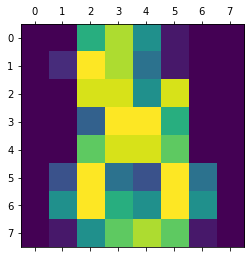

In [ ]:
import matplotlib.pyplot as plt  #we utilize matplot in order to graphically represent the images which otherwise would be represented in the form of numbers
#plt.gray()                      #This is optional, it grays out the graph so the image appears in black and white, Try running the code with and without the comment 
plt.matshow(digits.images[1796]) #by this we are adding the last image in the data set to the graph
plt.show()                       #This outputs the graph s we can see it, as you can see, each image is 8x8 pixels

#**Learning and Predicting**
SVMs: SVM is a supervised machine learning algorithm which can be used for classification or regression problems.

In [ ]:
from sklearn import svm  #again, we are import a Support Vector machine classification model, Check the trackIT for more information on SVMs
clf = svm.SVC(gamma=0.001, C=100.)     # these are manually set hyperparameter values, usually values are set based on cross validation
clf.fit(digits.data[:-1], digits.target[:-1]) #array that contains all but last items
clf.predict(digits.data[-1:]) #the last image is the test image


array([8])

# **Model Persistence**
  We can also store the model with pickle files.
  
   Pickle files are primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

In [ ]:
import pickle                        #pickle is a tool used to convert data in python
s = pickle.dumps(clf)            # the dump function stores the model we trained as a pickle file in s
clf2 = pickle.loads(s)           # loading back the model onto another placeholder
clf2.predict(digits.data[-1:])   #we can agai use the model to test images just like before

array([8])

# **Recognizing hand-written digits:**

An example showing how the scikit-learn can be used to recognize images of hand-written digits.

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()


# Reshaping the data to train the model

In [ ]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)  #stores the number of images
data = digits.images.reshape((n_samples, 64)) #reshapes the array such that the classifier can be applied to the data

#Creating a classifier

In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)  # hyperparameters are manually defined but you can choose to define them

#Splitting the Data

In [ ]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False) #half the data is for training, half is for testing, shuffle=false, means thta there is no shuffling of data before splitting
print(y_test) # if you want to check if the model predicts correctly, you can check this set below with the output on the next code snippet

[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3 1 4 0 5 3 

#Training and Testing

9


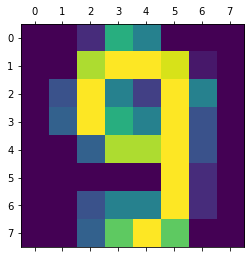

In [ ]:
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train) #the model is now trained and ready for testing

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test) # we test the second half of the data and store it into predicted 
print(predicted[-2]) #You can check for other elements in the second half of the set by plugging -1,-3 etc and checking with the image below
plt.matshow(digits.images[-2]) #by this we are adding the last image in the data set to the graph
plt.show()